In [1]:
#Get the adj close for a portfolio consisting of Apple and AMZN beginning 2010 to current 
#normalize the dat to make a comparison between the securties i nthe portfolio
#calculate the simple daily return for the portfolio 
#calculate the Volitility forthe portfolio  assuming the portfolio is equally weighted
#calculate the total return for the portfolio 
#calculate when the return for the  potrfolio profvided a negative return 
#perform a coorelation analysis for the portfilio 
#perform a linear regression analysis on the portfolio and plot  the regression line 
#isther any predicitve analysis that can be determind for this portfolo->
#what are the pros and cons of the portfolio

In [4]:
import pandas as pd 
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [5]:
#1
tickers = ["AMZN", "AAPL"]
df = pd.DataFrame()
for t in tickers: 
    df[t] = wb.DataReader(t, "yahoo", start = "2010-1-1")["Adj Close"]

In [6]:
df

,AMZN,AAPL
Date,,
2010-01-04,133.899994,26.601469
2010-01-05,134.690002,26.647457
2010-01-06,132.250000,26.223597
2010-01-07,130.000000,26.175119
2010-01-08,133.520004,26.349140
...,...,...
2019-12-10,1739.209961,268.480011
2019-12-11,1748.719971,270.769989
2019-12-12,1760.329956,271.459991


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2506 entries, 2010-01-04 to 2019-12-16
Data columns (total 2 columns):
AMZN    2506 non-null float64
AAPL    2506 non-null float64
dtypes: float64(2)
memory usage: 58.7 KB


In [8]:
df.columns

Index(['AMZN', 'AAPL'], dtype='object')

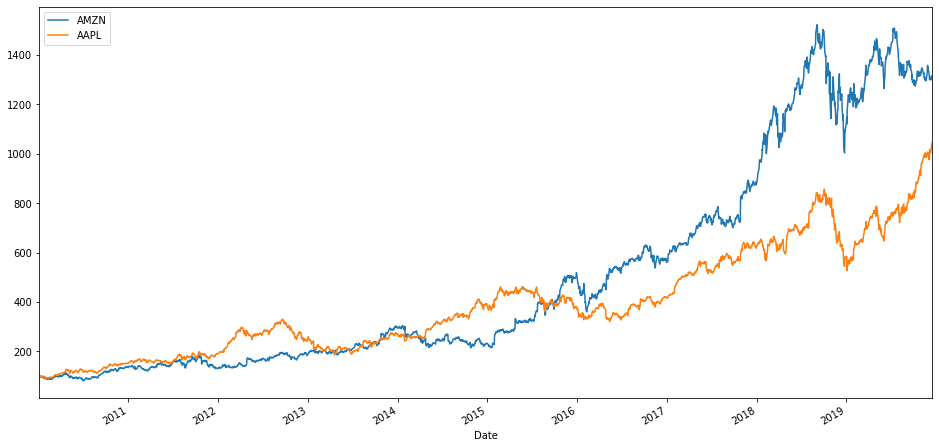

In [10]:
#2 -> Normalize the data 
(df/df.iloc[0] * 100).plot(figsize = (16,8))

In [11]:
#2 -> simple daily returns 
simple_returns = (df/df.shift(1)) -1

In [14]:
simple_returns.dropna()

,AMZN,AAPL
Date,,
2010-01-05,0.005900,0.001729
2010-01-06,-0.018116,-0.015906
2010-01-07,-0.017013,-0.001849
2010-01-08,0.027077,0.006648
2010-01-11,-0.024041,-0.008821
...,...,...
2019-12-10,-0.005887,0.005844
2019-12-11,0.005468,0.008529
2019-12-12,0.006639,0.002548


In [18]:
#volitility of the portfolio 
weights = np.array([0.5,0.5])
port_variance = np.dot(weights.T, np.dot(simple_returns.cov() * 250, weights))
port_volatility = port_variance ** 0.5
print(f"The volatility of the portfolio is {round(port_volatility, 3)* 100} %")

The volatility of the portfolio is 23.7 %


In [24]:
#Total return for the portfolio for the given period 
annual_return = simple_returns.mean() * 250
total_return = np.dot(weights, annual_return)
print(f"The total return for the portfolio for the period is {round(total_return, 2)*100}%")

The total return for the portfolio for the period is 28.999999999999996%


In [27]:
#calculate when the portfolio generated a negative return and plot these periods.Find out when each 
#security performed the the worst and wat year . Research why 
loss_returns = simple_returns[(simple_returns["AMZN"] < 0) & (simple_returns["AAPL"] < 0)]

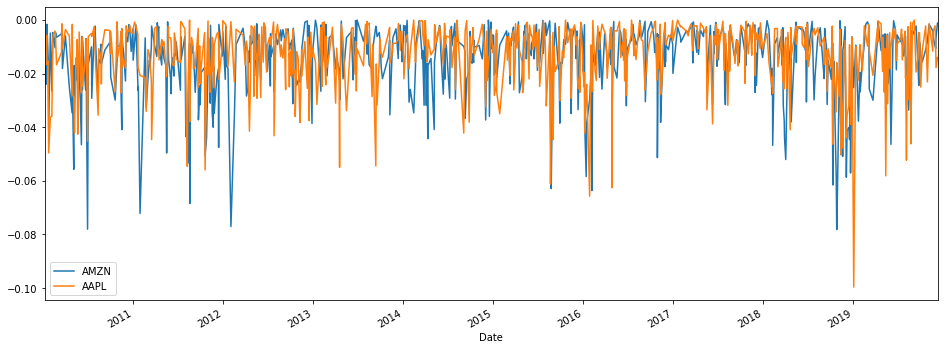

In [30]:
loss_returns.plot(figsize = (16,6))
plt.show()

In [31]:
#coorelation analysis -> generate a coorelation Matrix 
simple_returns.corr()

,AMZN,AAPL
AMZN,1.000000,0.397037
AAPL,0.397037,1.000000


In [35]:
simple_returns.cov() * 250

,AMZN,AAPL
AMZN,0.095360,0.031487
AAPL,0.031487,0.065953
